# DataFrames Intermediate

<img src=media/pandas.jpg title="Photo by Ramaz Bluashvili on Pexels" width=400/>

Welcome to the "DataFrame Intermediate" unit of the Python Academy! In this unit, we will join what we've learned in the units "DataFrames" (Session 1) and in "Functions" (Session 2), put them together and improve our coding skills!

In this notebook, you will learn:
  - Load and preview data
  - Get basic statistics
  - Detect common data problems
  - Handle categorical, strings and datetime variables
  - Aggregate data
  - Visualize data with plots
  - Apply functions on DataFrames
  - Common pandas tricks

The goal of this Unit is to showcase how powerful and flexible the `pandas` package can be, not to detail every functionality to exhaustion. While you are reading this, **think outside the box** and try to come up with **other things you'd like to see happening** with your data. Then, google them! Really, even the most senior developers google things everyday and it is fine. Programmers are paid to deliver, not to remember everything from hearth without internet access (most of them at least).

<div class="alert alert-warning">
    💡 <b>TIP</b>: <b>Think outside the box</b>, imagine what you'd like to see happening and google how to do it with pandas.
</div>

In [2]:
import pandas as pd

Before we start, remember when we talked about functions and methods? How methods are functions associated with objects/classes? The majority of the examples in this unit are exactly that. We will not create the functions from scratch to handle operations in DataFrames, we will leverage the ones already developed and documented in the [pandas docs](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html), which are tightly associated with the `pandas` objects (e.g. `Series`, `DataFrame`).

Leveraging the code already developed by pandas maintainers enable us to:
  1. **Re-use code** already developed. Avoid the need to reinvent the wheel.
  2. Use **optimized code**. Most likely, pandas native code will be faster than yours for the same functionality.

Whenever we have operations that act on columns and/or rows, the convention is to operate on `axis=0` for index (i.e. rows) and `axis=1` for columns.

## Load, Preview Data

To check how functions work in DataFrames, let's create a `DataFrame` with an [internal dataset of insurance cross-selling]('.\data\fidelidade_x-sell.pptx'). For now, we leverage the [`.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method to easily import our dataset. Handling more file types will be covered in a follwing session.

By convention (only), DataFrames are usually referred to `df` as a variable name.

After importing the data, to guarantee its correctness we can:
  - preview first rows with `.head()`
  - preview last rows with `.tail()`
  - get general properties with `.info()`;
  - get statistical properties with `.describe()`

In [3]:
# load data into 
df = pd.read_csv(
    "./data/fidelidade_x-sell_dataset.csv",
    sep=";",
    encoding="ISO-8859-1"
)

In [4]:
# first rows (default 5)
df.head(3)

,ANO_MES,ID_CLIENTE,IND_PESSOA_SING_COLECTIVA_ENI,INT_T_S_GLOBAL,COD_ESTADO_CLIENTE,COD_SEGMENTO_CLIENTE,Q_KM_MIN_DIST_PREST_SD,D_CONCELHO,D_DISTRITO,D_NUT2,...,Q_APL_DOWNGR_UMES,Q_APL_NOV_U12M,Q_APL_NOV_U36M,Q_APL_NOV_UMES,Q_APL_VIG_T_S_AP,Q_APL_VIG_T_S_MRH,Q_APL_VIG_T_S_PPR,Q_APL_VIG_T_S_VDO,Q_APL_VIG_T_S_VDR,Q_APL_VIG_T_S_SD
0,201809,1,Pessoa singular,T,ANTIGO,S1P,NaN,MATOSINHOS,PORTO,REGIÃO DO NORTE,...,0,0,0,0,0,1,0,0,0,0
1,201810,2,Pessoa singular,T,ANTIGO,A1P,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,202001,3,Pessoa singular,T+S,ANTIGO,A1P,34.41,VENDAS NOVAS,ÉVORA,REGIÃO DO ALENTEJO,...,0,0,0,0,2,0,0,0,0,0


In [30]:
# last rows (default 5)
df.tail()

,ANO_MES,ID_CLIENTE,IND_PESSOA_SING_COLECTIVA_ENI,INT_T_S_GLOBAL,COD_ESTADO_CLIENTE,COD_SEGMENTO_CLIENTE,Q_KM_MIN_DIST_PREST_SD,D_CONCELHO,D_DISTRITO,D_NUT2,...,Q_APL_DOWNGR_UMES,Q_APL_NOV_U12M,Q_APL_NOV_U36M,Q_APL_NOV_UMES,Q_APL_VIG_T_S_AP,Q_APL_VIG_T_S_MRH,Q_APL_VIG_T_S_PPR,Q_APL_VIG_T_S_VDO,Q_APL_VIG_T_S_VDR,Q_APL_VIG_T_S_SD
99994,201810,99995,Pessoa singular,T,ANTIGO,A2A,NaN,SÃO PEDRO DO SUL,VISEU,CENTRO,...,0,0,0,0,0,0,0,0,0,0
99995,201901,99996,Pessoa singular,T,ANTIGO,A2A,7.215,OLIVEIRA DE FRADES,VISEU,CENTRO,...,0,0,1,0,0,0,0,0,0,0
99996,201901,99997,Pessoa singular,T+S,ANTIGO,A3H,12.765,OLIVEIRA DE FRADES,VISEU,CENTRO,...,0,0,1,0,0,0,2,0,0,0
99997,201809,99998,Pessoa singular,T+S,ANTIGO,A2A,NaN,BRAGANÇA,BRAGANÇA,REGIÃO DO NORTE,...,0,1,4,0,0,2,2,0,0,0
99998,201906,99999,ENI,T,RECENTE,PN,1.221,COIMBRA,COIMBRA,CENTRO,...,0,0,1,0,0,0,0,0,0,0


In [31]:
# general properties
df[["ANO_MES", "ID_CLIENTE", "IND_PESSOA_SING_COLECTIVA_ENI", "COD_ESTADO_CLIENTE"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ANO_MES                        99999 non-null  int64 
 1   ID_CLIENTE                     99999 non-null  int64 
 2   IND_PESSOA_SING_COLECTIVA_ENI  99999 non-null  object
 3   COD_ESTADO_CLIENTE             99999 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.1+ MB


In [32]:
# statistical properties
df.describe()

,ANO_MES,ID_CLIENTE,Q_KM_MIN_DIST_PREST_SD,Q_ANOS_ANTIG_CLIENTE,IDADE,F_FALECIDO,Q_APL_VIG_T_S,Q_APL_VIG_MENOS_2_ANOS,Q_APL_VIG_ENTRE_2_4_ANOS,Q_APL_VIG_ENTRE_4_6_ANOS,...,Q_APL_DOWNGR_UMES,Q_APL_NOV_U12M,Q_APL_NOV_U36M,Q_APL_NOV_UMES,Q_APL_VIG_T_S_AP,Q_APL_VIG_T_S_MRH,Q_APL_VIG_T_S_PPR,Q_APL_VIG_T_S_VDO,Q_APL_VIG_T_S_VDR,Q_APL_VIG_T_S_SD
count,99999.000000,99999.000000,72462.000000,99914.000000,99999.000000,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,201903.275123,50000.000000,4.150708,17.834685,56.129891,0.0,2.624246,0.439044,0.399644,0.361364,...,0.043450,0.247252,0.690787,0.025610,0.084831,0.310513,0.868029,0.000550,0.003580,0.208742
std,62.336376,28867.369122,7.212557,10.417667,3.049227,0.0,2.539002,0.832091,0.837210,0.826880,...,0.212657,0.552071,1.038768,0.170923,0.392628,0.577390,2.048770,0.033611,0.133968,0.575425
min,201809.000000,1.000000,0.000000,0.000000,18.000000,0.0,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,201901.000000,25000.500000,0.555000,9.670000,55.000000,0.0,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,201906.000000,50000.000000,1.776000,18.420000,57.000000,0.0,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,201911.000000,74999.500000,5.217000,25.420000,58.000000,0.0,3.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000
max,202005.000000,99999.000000,256.743000,117.670000,59.000000,0.0,46.000000,21.000000,22.000000,20.000000,...,4.000000,10.000000,38.000000,5.000000,7.000000,23.000000,46.000000,4.000000,19.000000,6.000000


In [40]:
# check dataframe columns
df.columns

Index(['ANO_MES', 'ID_CLIENTE', 'IND_PESSOA_SING_COLECTIVA_ENI',
       'INT_T_S_GLOBAL', 'COD_ESTADO_CLIENTE', 'COD_SEGMENTO_CLIENTE',
       'Q_KM_MIN_DIST_PREST_SD', 'D_CONCELHO', 'D_DISTRITO', 'D_NUT2',
       'D_NUT3_REV2', 'I_INTERIOR_LITORAL', 'I_RURAL_URBANO',
       'Q_ANOS_ANTIG_CLIENTE', 'D_ESTADO_CIVIL', 'SEXO', 'IDADE', 'F_FALECIDO',
       'D_CABAZ_ATUAL', 'D_CABAZ_HOM', 'Q_APL_VIG_T_S',
       'Q_APL_VIG_MENOS_2_ANOS', 'Q_APL_VIG_ENTRE_2_4_ANOS',
       'Q_APL_VIG_ENTRE_4_6_ANOS', 'Q_APL_VIG_ENTRE_6_8_ANOS',
       'Q_APL_VIG_MAIS_8_ANOS', 'Q_DIST_FAMILIAS_APL_VIG',
       'D_FAM_APL_MAIS_ANTIGA', 'D_FAM_APL_MAIS_RECENTE', 'F_SEGUROS_VIDA',
       'F_SEGUROS_FINANCEIROS', 'F_CHURN_VDR', 'F_CHURN_VDO', 'F_CHURN_SD',
       'F_CHURN_MRH', 'Q_CONT_GAC_UMES', 'Q_CONT_GAC_U2M', 'Q_CONT_GAC_U3M',
       'Q_CONT_GAC_U6M', 'Q_CONT_GAC_U9M', 'Q_CONT_GAC_U12M', 'Q_SIM_UMES',
       'Q_SIM_U12M', 'Q_SIM_U36M', 'Q_SIM_U12M_VDO', 'Q_SIM_U12M_VDR',
       'Q_MESES_ULT_COMPRA_APL', 'D_

In [47]:
# frequency of values in a column

df["COD_ESTADO_CLIENTE"].value_counts()



ANTIGO        78861
RECENTE       10327
CONHECIDO      5456
NOVO           4364
RECUPERADO      991
Name: COD_ESTADO_CLIENTE, dtype: int64

## Basic Statistics

Pandas provides a ton of useful methods for statistical properties by default.

| Method                    | Description                                                                                                   |
|---------------------------|---------------------------------------------------------------------------------------------------------------|
| `.count()`                | counts the number of non-NAs                                                                                  |
| `.sum(),` `.cumsum()`     | sum of values, cumulative sum of values                                                                       |
| `.nunique()`              | count number of distinct elements                                                                             |
| `.value_counts()`         | count of distinct elements                                                                                    |
| `.mean()`, `median()`     | mean of values (i.e. average), median of values                                                               |
| `.mode()`                 | most frequent value                                                                                           |
| `.min()`, `.max()`        | minimum, maximum of values                                                                                    |
| `.idxmin()`, `.idxmax()`  | index of minimum, maximum values                                                                              |
| `.var()`, `.std()`        | unbiased variance, sample standard deviation                                                                  |
| `.quantile(q=0.2)`        | values at given quantile (q, default 0.5)                                                                     | 
| `.skew()`, `.kurt()`      | unbiased [skew](https://en.wikipedia.org/wiki/Skewness), [kurtosis](https://en.wikipedia.org/wiki/Kurtosis)   |
| `.cov()`                  | pairwise covariance between columns
| `.corr()`                 | pairwise correlation between columns

## Data Problems

A lot of messy stuff can occur with our datasets. We always hope for the best, but most of the time (always..) our data is not how we hoped for. To help us out,

| Method                    | Description                                                                                                   |
|---------------------------|---------------------------------------------------------------------------------------------------------------|
| `.isna()`                 | detects missing values. alias `.isnull()`                                                                     |
| `.fillna()`               | fills missing values                                                                          
| `.duplicated()`           | detects duplicated rows
| `.drop_duplicates()`      | removes duplicated rows


## Categoricals, Strings and Datetimes

In general programming, an **accessor** works by fetching private data stored within an object. In pandas, the accessors work as an interface for additional methods specifically built for categorical data (`.cat`), string data (`.str`) and datetime data (`.dt`). We provide a list of some useful functionalities below; for additional functionality refer to documentation links provided below.

### `.cat`

Official docs for [`.Series.cat`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.html).

| Method                            | Description                                           |
|-----------------------------------|-------------------------------------------------------|
| `Series.cat.categories`           | displays or assigns of a categorical                  |
| `Series.cat.rename_categories()`  | rename categories
| `Series.cat.add_categories()`                | add categories           |
| `Series.cat.remove_unused_categories()`                | removes categories not in use |

### `.str`

Pandas provides vectorized [string methods](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.html?highlight=str) with `.str` for Series and Index, that perform common operations for dealing with text variables.

| Method                    | Description                                           |
|---------------------------|-------------------------------------------------------|
| `.str.lower()`, `.str.upper()`  | converts to lowercase, uppercase                  |
| `.str.strip()`                | removes leading and trailing characters           |
| `.str.replace()`              | replace each occurrence of pattern/regex          |
| `.str.split()`                | split strings around given separator/delimiter    |
| `.str.cat()`              | concatenate strings with given separator          |

### `.dt`

[Official docs](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html) for `.Series.dt`.

| Method                                    | Description                                           |
|-------------------------------------------|-------------------------------------------------------|
| `pd.date_range()`                         | creates a range of datetime values          |
| `pd.to_datetime()`                        | converts to datetime |
| `.dt.{second, minute, hour, quarter} `    | displays datetime properties of values          |

In [39]:
# converting ANO_MES column to datetime
df["ANO_MES"] = pd.to_datetime(df["ANO_MES"], format="%Y%m")

In [42]:
# convert column I_RURAL_URBANO that specifies client location segment, to categorical column
df["I_RURAL_URBANO"] = df["I_RURAL_URBANO"].astype("category")


ÁREA PREDOMINANTEMENTE URBANA    40878
ÁREA MEDIAMENTE URBANA           33508
ÁREA PREDOMINANTEMENTE RURAL     23279
Name: I_RURAL_URBANO, dtype: int64

## Slice/ Filter data

A lot of times, you don't need all the data from a dataset and you may filter based on multiple conditions.

Let's say we want to store in another dataframe:
 1. All  'RECENTE' or 'NOVO' clients from  column COD_ESTADO_CLIENTE
 2. Clients that are 'Pessoa Singular' from column IND_PESSOA_SING_COLECTIVA_ENI
 3. Clients whose Segment starts with an 'A' (i.e: A2A, A1P, A3H, etc)    

In [55]:
sliced_df = (
    df[
    ((df["COD_ESTADO_CLIENTE"] == 'RECENTE') | (df["COD_ESTADO_CLIENTE"] == 'NOVO')) &
    (df["IND_PESSOA_SING_COLECTIVA_ENI"] == 'Pessoa singular') &
    (df["COD_SEGMENTO_CLIENTE"].str.startswith('A'))
    ]
)

In [57]:
sliced_df.head(3)

,ANO_MES,ID_CLIENTE,IND_PESSOA_SING_COLECTIVA_ENI,INT_T_S_GLOBAL,COD_ESTADO_CLIENTE,COD_SEGMENTO_CLIENTE,Q_KM_MIN_DIST_PREST_SD,D_CONCELHO,D_DISTRITO,D_NUT2,...,Q_APL_DOWNGR_UMES,Q_APL_NOV_U12M,Q_APL_NOV_U36M,Q_APL_NOV_UMES,Q_APL_VIG_T_S_AP,Q_APL_VIG_T_S_MRH,Q_APL_VIG_T_S_PPR,Q_APL_VIG_T_S_VDO,Q_APL_VIG_T_S_VDR,Q_APL_VIG_T_S_SD
250,2019-05-01,251,Pessoa singular,T,RECENTE,A2A,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0
262,2019-11-01,263,Pessoa singular,T+S,RECENTE,A3H,NaN,SANTA COMBA DÃO,VISEU,CENTRO,...,0,0,1,0,0,0,2,0,0,0
263,2018-12-01,264,Pessoa singular,T,RECENTE,A2A,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0


## Aggregate Data

You can leverage pandas to [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html) and explore your data aggregated by a specific entity.

In [63]:
# average bpm per year on top
sliced_df.groupby('ANO_MES').mean()['IDADE']

C:\Users\crocs\AppData\Local\Temp\ipykernel_22624\2762524997.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sliced_df.groupby('ANO_MES').mean()['IDADE']


ANO_MES
2018-09-01    55.492408
2018-10-01    55.438272
2018-11-01    55.344754
2018-12-01    55.377155
2019-01-01    55.620253
2019-02-01    55.520782
2019-03-01    55.697425
2019-04-01    55.673123
2019-05-01    55.786517
2019-06-01    55.945946
2019-07-01    56.011416
2019-08-01    55.667488
2019-09-01    55.650350
2019-10-01    55.692124
2019-11-01    55.879679
2019-12-01    56.143921
2020-01-01    56.090698
2020-02-01    55.953930
2020-03-01    55.969072
2020-04-01    56.336735
2020-05-01    55.979381
Name: IDADE, dtype: float64

## Plots

Pandas provides plotting functionality, which is fairly sufficient for us to get a glimpse of our dataset without the need of importing other visualization packages (e.g. matplotlib, seaborn). These are available in [`DataFrame.plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) of 

<Axes: title={'center': 'Number of clients per month'}, xlabel='ANO_MES'>

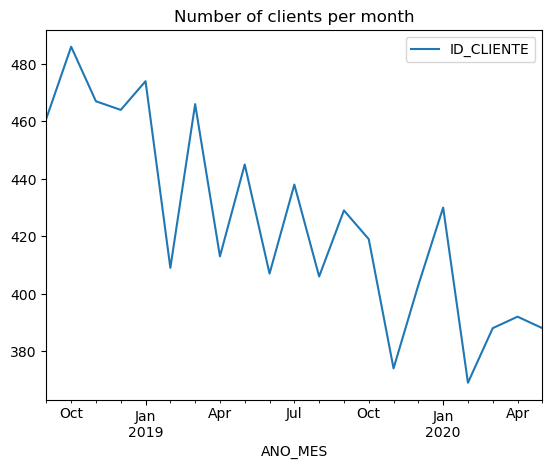

In [64]:
sliced_df.groupby('ANO_MES').count()[['ID_CLIENTE']].plot(title='Number of clients per month')

<Axes: title={'center': 'Top 10 Age of clients'}, xlabel='IDADE'>

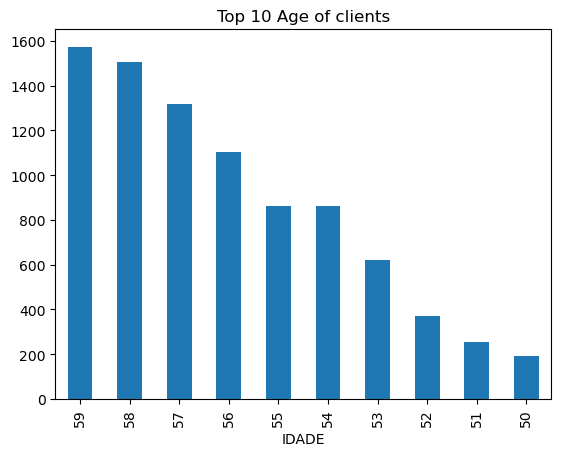

In [65]:
sliced_df.value_counts('IDADE').head(10).plot(kind='bar', title='Top 10 Age of clients')

### Multiple Plots

If you plot multiple plots in the same cell, you can see that they are printed separately. When we want to have them in the **same figure**, we make sure they **share the same axis**. 

The `pandas.DataFrame.plot()` method returns (one or many) [Axes](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes), depending on the way you call it. While this `Axes` class can get quite tricky really fast, for now we can simply store the axis returned by the first plot and provide it as an argument for the second `.plot()` call. In this way, we let Pandas know they should be displayed in the same picture.

The `ax` object you get may also be helpful to define other properties about the visualization (e.g. legend, title).

C:\Users\crocs\AppData\Local\Temp\ipykernel_22624\1879320114.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  ax = sliced_df.groupby('ANO_MES').min()['IDADE'].plot()
C:\Users\crocs\AppData\Local\Temp\ipykernel_22624\1879320114.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  ax = sliced_df.groupby('ANO_MES').max()['IDADE'].plot(ax=ax)


Text(0.5, 1.0, 'Min, Max Age of Clients')

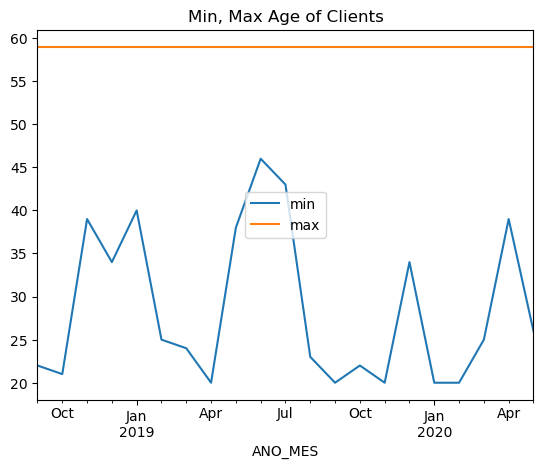

In [67]:
ax = sliced_df.groupby('ANO_MES').min()['IDADE'].plot()
ax = sliced_df.groupby('ANO_MES').max()['IDADE'].plot(ax=ax)
ax.legend(['min', 'max'])
ax.set_title('Min, Max Age of Clients')

We can also calculate multiple aggregate functions over a groupby and plot them all together! Instead of calling the function directly after the groupby, the `.agg()` method accepts a dictionary of `{column_name: agg_function}`, where `agg_function` can be:
  - one function as string, `{'bpm': 'mean'}`); or
  - many functions as a list of strings, `{'bpm': ['min', 'max']}`

<Axes: title={'center': 'Min, Max and Average Age per month'}, xlabel='ANO_MES'>

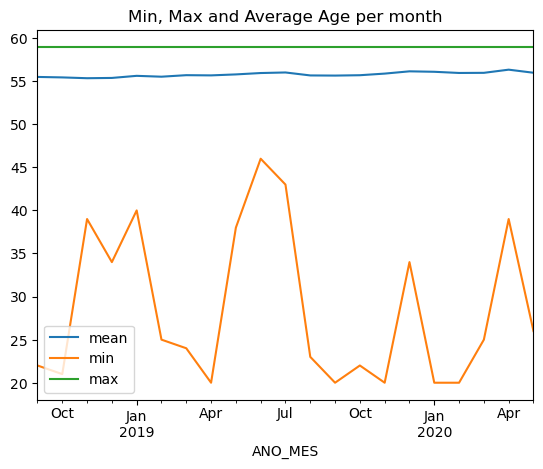

In [69]:
sliced_df.groupby('ANO_MES').agg({'IDADE': ['mean', 'min', 'max']})['IDADE'].plot(title='Min, Max and Average Age per month')

## Applying Functions over DataFrames

Sometimes, we need more than what is provided with pandas methods. Pandas supports multiple methods for creating/updating data into existing Series and DataFrames.

| Method                            | Description                                               |
|-----------------------------------|-----------------------------------------------------------|
| Arithmetic Operations             | add, subtract, divide and multiply all values in a Series |
| `.apply`                          | apply a function along an axis                            |
| `.applymap`                       | apply a function to a DataFrame elementwise               |
| `.assign`                         | assign new columns to a DataFrame                         |

## Notorious Tips

*Tweaks and tips that can help you better understand your data and code better with pandas*.

| Method                    | Description                                                                                                   |
|---------------------------|---------------------------------------------------------------------------------------------------------------|
| `pd.set_option(display.max_rows, 100)`      | change the maximum number of displayed rows                                       |
| `df.rename(columns={my_dict})`              | rename the columns using a dict mapping
| `df.select_dtypes()`                        | subsets columns by data type
| `df.sort_values(by=colA, ascending=False)`  | sort values by column
| `pd.cut()`                                  | sort data values into interval bins
| `pd.concat([df1, df2])`                     | merge several DataFrames




## Recap

Congratulations, you made it all the way "DataFrame Intermediate" unit! We know this is a lot of information and functionalities to take in, but rest assured you will become fluent when you start using pandas on a frequent basis. By the end of this notebook, you should have a clear idea of:
  1. Load data from a CSV file
  2. Perform exploratory data analysis on a DataFrame
  3. Manipulate categorical, string and datetime variables
  4. Aggregate data
  5. Visualize data with plots
  6. Apply functions on Pandas objects
  7. Most common tweaks and tips